In [ ]:
#install import stuff, you need to login and give google permissions twice
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!pip install lifelines

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

In [ ]:
#mount google drive
%cd
!mkdir -p drive
!google-drive-ocamlfuse drive

In [ ]:
#navigating your google drive and saving files inside.
%cd
%ls
%cd drive/
%mkdir ML_course_BII
#download model parameters
%ls -lh */
%ls -lh
%cd ML_course_BII
!wget https://www.dropbox.com/s/ibcplpvyyg86si8/Titanic.zip?dl=0 -O Titanic.zip
    
    
!unzip Titanic.zip
%cd Titanic
%ls -lh


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 100)

In [4]:
data = pd.read_csv('./train.csv')
train = data.iloc[:]


In [5]:
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
..           ...       ...     ...   
841          842         0       2   
842          843         1       1   
843          844         0       3   
844          845         0       3   
845          846         0       3   
846          847         0       3   
847          848         0       3   
848          849         0       2   
849          850         1       1   
850          851         0       3   
851          852         0       3   
852          853         0       3   
853          854         1       1   
854          855         0       2   
855          856         1       3   
856          857         1       1   
857          858         1       1   
858          859         1       3   
859          860         0       3   
860          861         0       3   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen H

# Q1 : what percentage of people in titanic died, Ans:0.616

# Q2 : Below is the way to access a subset of the dataframe by a column
# train[train['Sex']=='female'] access all 'Sex'==female rows
# Q2a. get the number of women survivors, Ans : 233
# Q2b. get percentage of women who survived, Ans : 0.742
# Q2c. get percentage of men who survived, Ans : 0.189


233

### code the above quicker

In [1]:
print(train.groupby(['Sex'])['Survived'].apply(np.sum))
print(train.groupby(['Sex'])['Survived'].apply(np.mean))

NameError: name 'train' is not defined

# Q3 Describe the following code in words

In [2]:
#you can do this in the various ways
train.groupby(['Sex','Pclass'])['Survived'].apply(np.mean)
train.groupby(['Sex','Pclass'])['Survived'].apply(len)

NameError: name 'train' is not defined

# Q4  create a new column child, where it is 1 if age of passenger <=12 and 0 otherwise

# Q5. We predict that all females died and all males survived, interpret the confusion matrix?

In [6]:
from sklearn.metrics import confusion_matrix
y_true = train['Survived']
y_pred = train['Sex']=='female'
Confusion_mat = confusion_matrix(y_true,y_pred)
print (Confusion_mat)
print ((Confusion_mat[0,0]+Confusion_mat[1,1])/np.sum(Confusion_mat)) #79% accuracy

[[468  81]
 [109 233]]
0.7867564534231201


In [7]:
#fill nissing values with dummy value -999
train = train.fillna(-999)

# Q6 build a descision tree model

In [17]:
from sklearn import tree
X_train, Y_train，X_test, Y_test 



# Q7 get train and test predictions and obtain confusion matrix

# look at model

In [209]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Titanic") 

'Titanic.pdf'

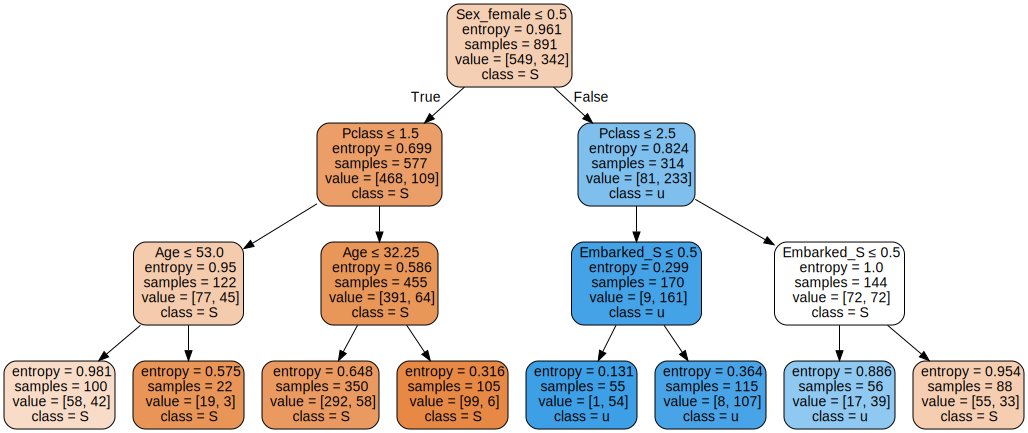

In [232]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.keys(),  
                      class_names="Survived",  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Q8 Predict the fare of the passenger based on age, gender, passenger class and embarked

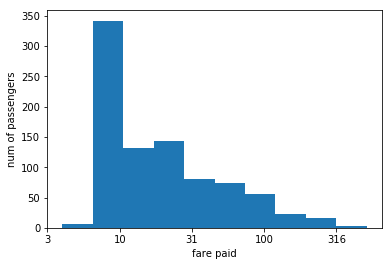

In [48]:
plt.hist(np.log10(train[train.Fare>0]['Fare']))
plt.xticks(np.array([0.5,1,1.5,2,2.5]),(10**np.array([0.5,1,1.5,2,2.5])).astype(np.int32))
plt.xlabel('fare paid')
plt.ylabel('num of passengers')
plt.show()

In [31]:
X = pd.get_dummies(train[train.Fare>0][['Age','Sex','Embarked','Pclass','Survived']])
y = train[train.Fare>0]['Fare']
fare_model = tree.DecisionTreeRegressor(max_depth=3)
fare_model.fit(X,y)


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

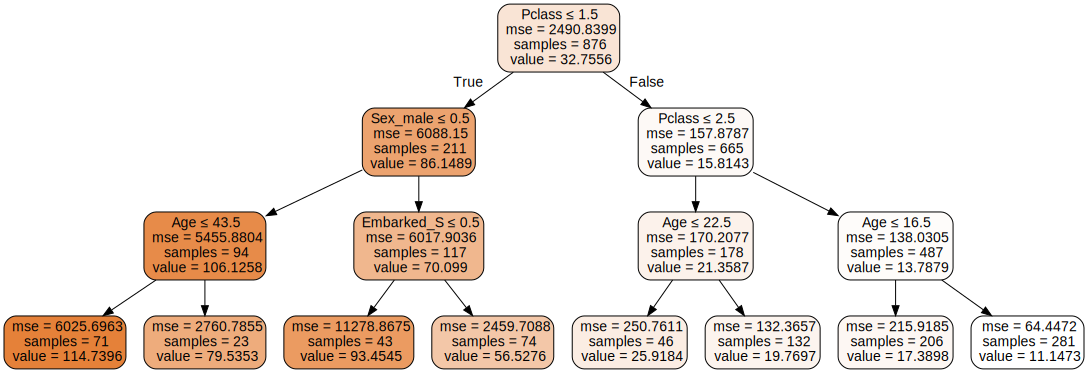

In [32]:
import graphviz 
dot_data = tree.export_graphviz(fare_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Titanic_fare") 
dot_data = tree.export_graphviz(fare_model, out_file=None, 
                                feature_names=X.keys(),  
                      class_names="Survived",  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph